# Projeto Final IA

## Introdução
Este projeto tem como objetivo a aplicação de um algoritmo de aprendizado de máquina para predição da quantidade de eletricidade produzida e consumida pelos clientes de energia da Estónia que instalaram painéis solares. O link da competição constando o dataset: https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers/overview.

O dataset contém 2M+ de linhas e 9 colunas, sendo elas:
- **county**: identificador do município
- **is_business**: se o cliente é uma empresa ou não
- **product_type**: tipo de contrato adquirido, podendo ser: {0: "combinado", 1: "fixo", 2: "serviço geral": 3: "spot"}
- **target**: o valor de consumo ou produção do segmento relevante da hora. Os segmentos são definidos pelo _município_, _is_business_ e _product_type_.
- **is_consumption**: se o valor é de consumo ou produção
- **datetime**: data e hora da medição
- **data_block_id**: identificador do bloco de dados. Todos os registro com o mesmo _data_block_id_ pertencem ao mesmo bloco de dados disponibilizado.
- **row_id**: identificador da linha
- **prediction_unit_id**: identificador único para cada combinação de _county_, _is_business_ e _product_type_.

### Importando as bibliotecas e dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
train_df = pd.read_csv("./datasets/train.csv")

train_df

county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
2             0            0             2    0.000               0   
3             0            0             2   17.314               1   
4             0            0             3    2.904               0   
...         ...          ...           ...      ...             ...   
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
0        2021-09-01 00:00:00              0        0                   0  
1        2021-09-01 00:00:00              0        1                   0  
2        2021-09-01 00:00:00              0        2                   1  
3        2021-09-01 00:00:00              0        3                   1  
4        2021-09-01 00:00:00              0        4                   2  
...                      ...            ...      ...                 ...  
2018347  2023-05-31 23:00:00            637  2018347                  64  
2018348  2023-05-31 23:00:00            637  2018348                  59  
2018349  2023-05-31 23:00:00            637  2018349                  59  
2018350  2023-05-31 23:00:00            637  2018350                  60  
2018351  2023-05-31 23:00:00            637  2018351                  60  

[2018352 rows x 9 columns]

### Análise Exploratória

#### Identificando valores nulos

In [3]:
# Identificando valores nulos
train_df[train_df["target"].isna()]

county  is_business  product_type  target  is_consumption  \
178938        0            0             1     NaN               0   
178939        0            0             1     NaN               1   
178940        0            0             2     NaN               0   
178941        0            0             2     NaN               1   
178942        0            0             3     NaN               0   
...         ...          ...           ...     ...             ...   
1806379      15            1             0     NaN               1   
1806380      15            1             1     NaN               0   
1806381      15            1             1     NaN               1   
1806382      15            1             3     NaN               0   
1806383      15            1             3     NaN               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
178938   2021-10-31 03:00:00             60   178938                   0  
178939   2021-10-31 03:00:00             60   178939                   0  
178940   2021-10-31 03:00:00             60   178940                   1  
178941   2021-10-31 03:00:00             60   178941                   1  
178942   2021-10-31 03:00:00             60   178942                   2  
...                      ...            ...      ...                 ...  
1806379  2023-03-26 03:00:00            571  1806379                  64  
1806380  2023-03-26 03:00:00            571  1806380                  59  
1806381  2023-03-26 03:00:00            571  1806381                  59  
1806382  2023-03-26 03:00:00            571  1806382                  60  
1806383  2023-03-26 03:00:00            571  1806383                  60  

[528 rows x 9 columns]

In [4]:
# Removendo os valores nulos
train_df = train_df.dropna()

In [5]:
# Removendo coluna de índice
df = train_df
df = df.drop(columns=["row_id"])
df.head()

county  is_business  product_type  target  is_consumption  \
0       0            0             1   0.713               0   
1       0            0             1  96.590               1   
2       0            0             2   0.000               0   
3       0            0             2  17.314               1   
4       0            0             3   2.904               0   

              datetime  data_block_id  prediction_unit_id  
0  2021-09-01 00:00:00              0                   0  
1  2021-09-01 00:00:00              0                   0  
2  2021-09-01 00:00:00              0                   1  
3  2021-09-01 00:00:00              0                   1  
4  2021-09-01 00:00:00              0                   2

#### Correspondência entre features

/tmp/ipykernel_4743/267686861.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

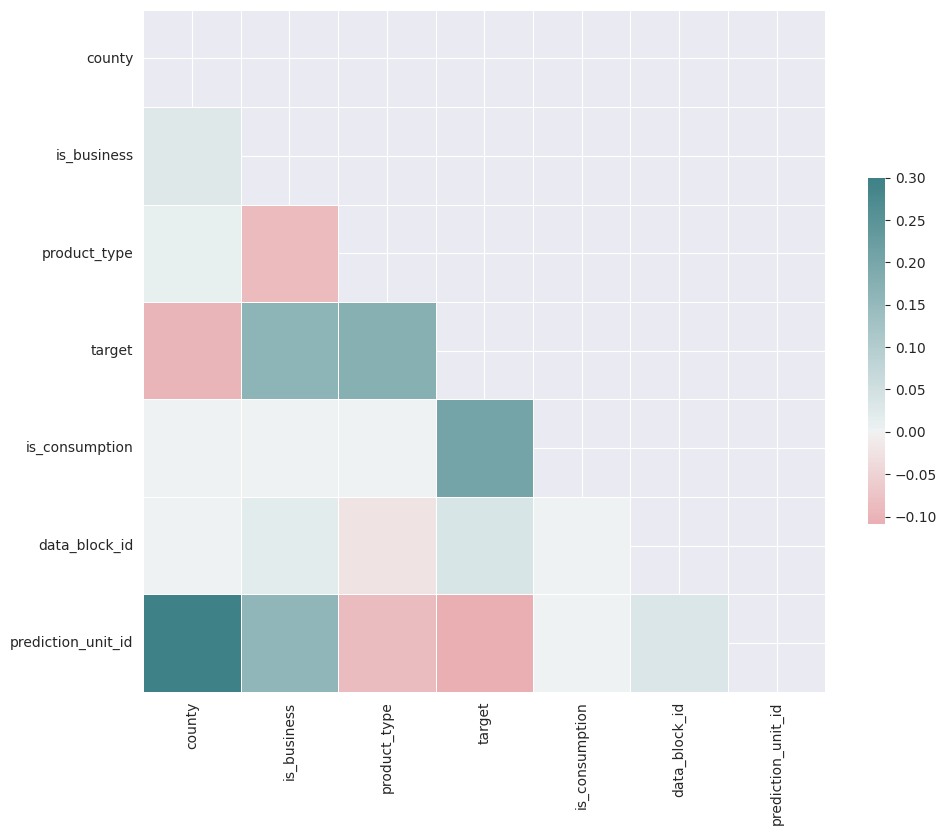

In [6]:
# Calcular matriz de correlação
corr = df.corr()

# Gerar uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar a figura matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar um mapa de cores divergentes personalizado
cmap = sns.diverging_palette(10, 200, as_cmap=True)

# Desenhar o mapa de calor com a máscara e a proporção correta
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017824 entries, 0 to 2018351
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   prediction_unit_id  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 138.6+ MB


In [8]:
df.describe()

county   is_business  product_type        target  is_consumption  \
count  2.017824e+06  2.017824e+06  2.017824e+06  2.017824e+06       2017824.0   
mean   7.297039e+00  5.368268e-01  1.898927e+00  2.748556e+02             0.5   
std    4.780994e+00  4.986421e-01  1.081766e+00  9.095024e+02             0.5   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             0.0   
25%    3.000000e+00  0.000000e+00  1.000000e+00  3.780000e-01             0.0   
50%    7.000000e+00  1.000000e+00  2.000000e+00  3.113300e+01             0.5   
75%    1.100000e+01  1.000000e+00  3.000000e+00  1.802062e+02             1.0   
max    1.500000e+01  1.000000e+00  3.000000e+00  1.548027e+04             1.0   

       data_block_id  prediction_unit_id  
count   2.017824e+06        2.017824e+06  
mean    3.218754e+02        3.304540e+01  
std     1.826310e+02        1.959062e+01  
min     0.000000e+00        0.000000e+00  
25%     1.660000e+02        1.600000e+01  
50%     3.230000e+02        3.300000e+01  
75%     4.790000e+02        5.000000e+01  
max     6.370000e+02        6.800000e+01

#### Converter os labels para números
- Como não há labels com valores categóricos, não é necessário converter os labels para números.

### Normalização dos dados
- Observar se os dados estão normalizados, e quais variáveis precisam ser normalizadas.

In [9]:
df.head()

county  is_business  product_type  target  is_consumption  \
0       0            0             1   0.713               0   
1       0            0             1  96.590               1   
2       0            0             2   0.000               0   
3       0            0             2  17.314               1   
4       0            0             3   2.904               0   

              datetime  data_block_id  prediction_unit_id  
0  2021-09-01 00:00:00              0                   0  
1  2021-09-01 00:00:00              0                   0  
2  2021-09-01 00:00:00              0                   1  
3  2021-09-01 00:00:00              0                   1  
4  2021-09-01 00:00:00              0                   2

<Axes: >

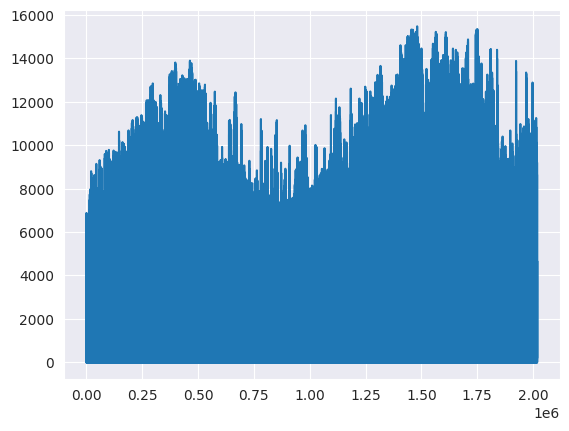

In [10]:
# Observando o comportamento da variável target, que é a variável que queremos prever, é identificado a necessidade de normalização na escala de 0 a 1.
df["target"].plot()

<Axes: >

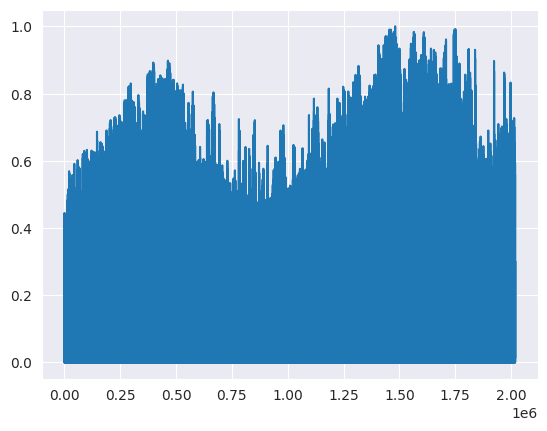

In [11]:
# Normalizando a variável target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["target"] = scaler.fit_transform(df[["target"]])
df["target"].plot()

In [12]:
# Observando o comportamento da variável is_consumption
df[:500][["datetime", "is_consumption"]]

datetime  is_consumption
0    2021-09-01 00:00:00               0
1    2021-09-01 00:00:00               1
2    2021-09-01 00:00:00               0
3    2021-09-01 00:00:00               1
4    2021-09-01 00:00:00               0
..                   ...             ...
495  2021-09-01 04:00:00               1
496  2021-09-01 04:00:00               0
497  2021-09-01 04:00:00               1
498  2021-09-01 04:00:00               0
499  2021-09-01 04:00:00               1

[500 rows x 2 columns]

### Visualização dos dados

<Axes: xlabel='is_consumption', ylabel='count'>

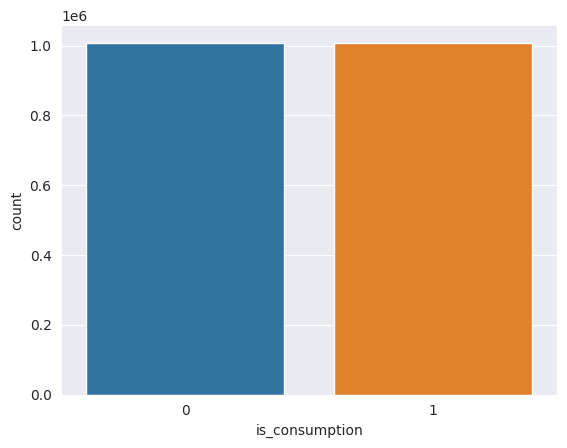

In [37]:
# gráfico de barras mostrando a quantidade de instâncias por classe
sns.countplot(x="is_consumption", data=df)

<Axes: xlabel='product_type', ylabel='count'>

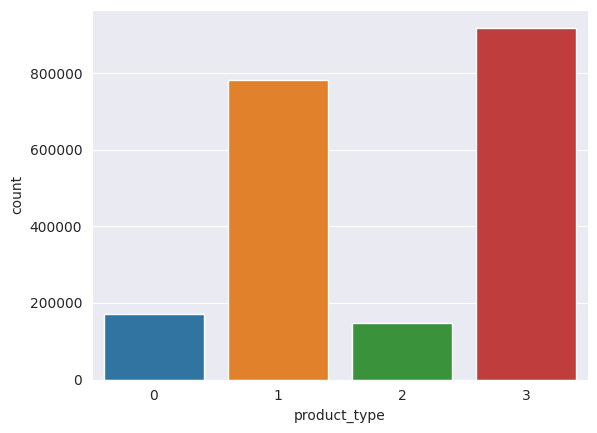

In [38]:
sns.countplot(x="product_type", data=df)

<Axes: xlabel='is_business', ylabel='count'>

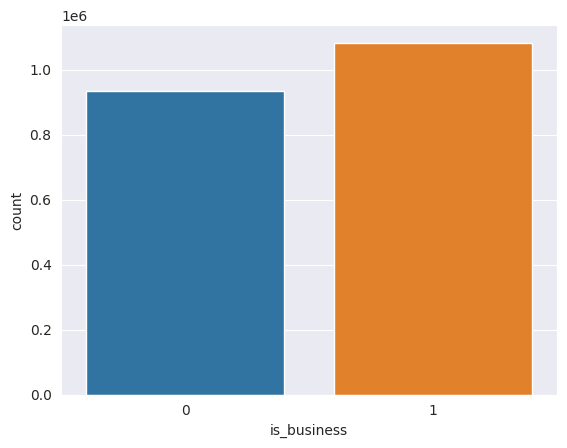

In [39]:
sns.countplot(x="is_business", data=df)

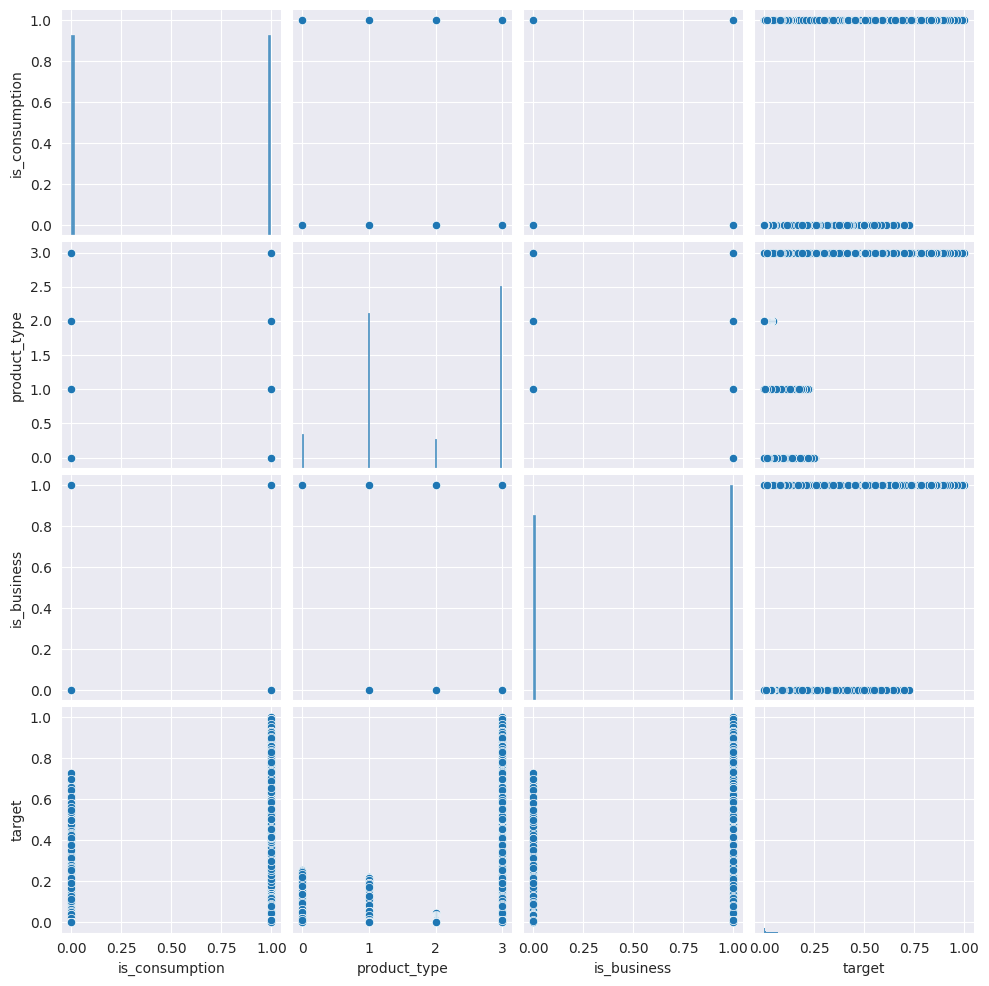

In [42]:
# scatter plot mostrando a relação entre as variáveis
sns.pairplot(df[["is_consumption", "product_type", "is_business", "target"]])

<Axes: xlabel='product_type', ylabel='target'>

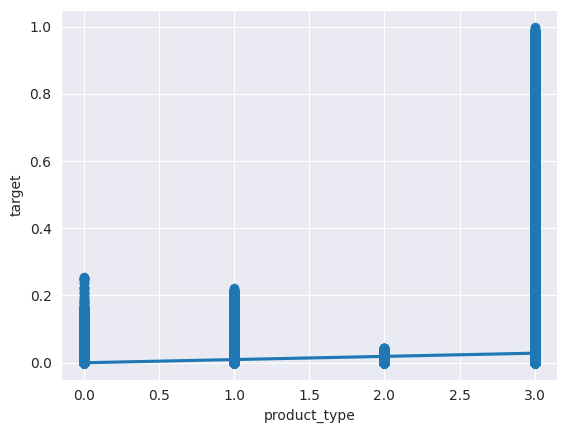

In [44]:
# gráfico de dispersão com linha de regressão
sns.regplot(x="product_type", y="target", data=df)

### Visualização da série temporal

<Axes: xlabel='datetime', ylabel='target'>

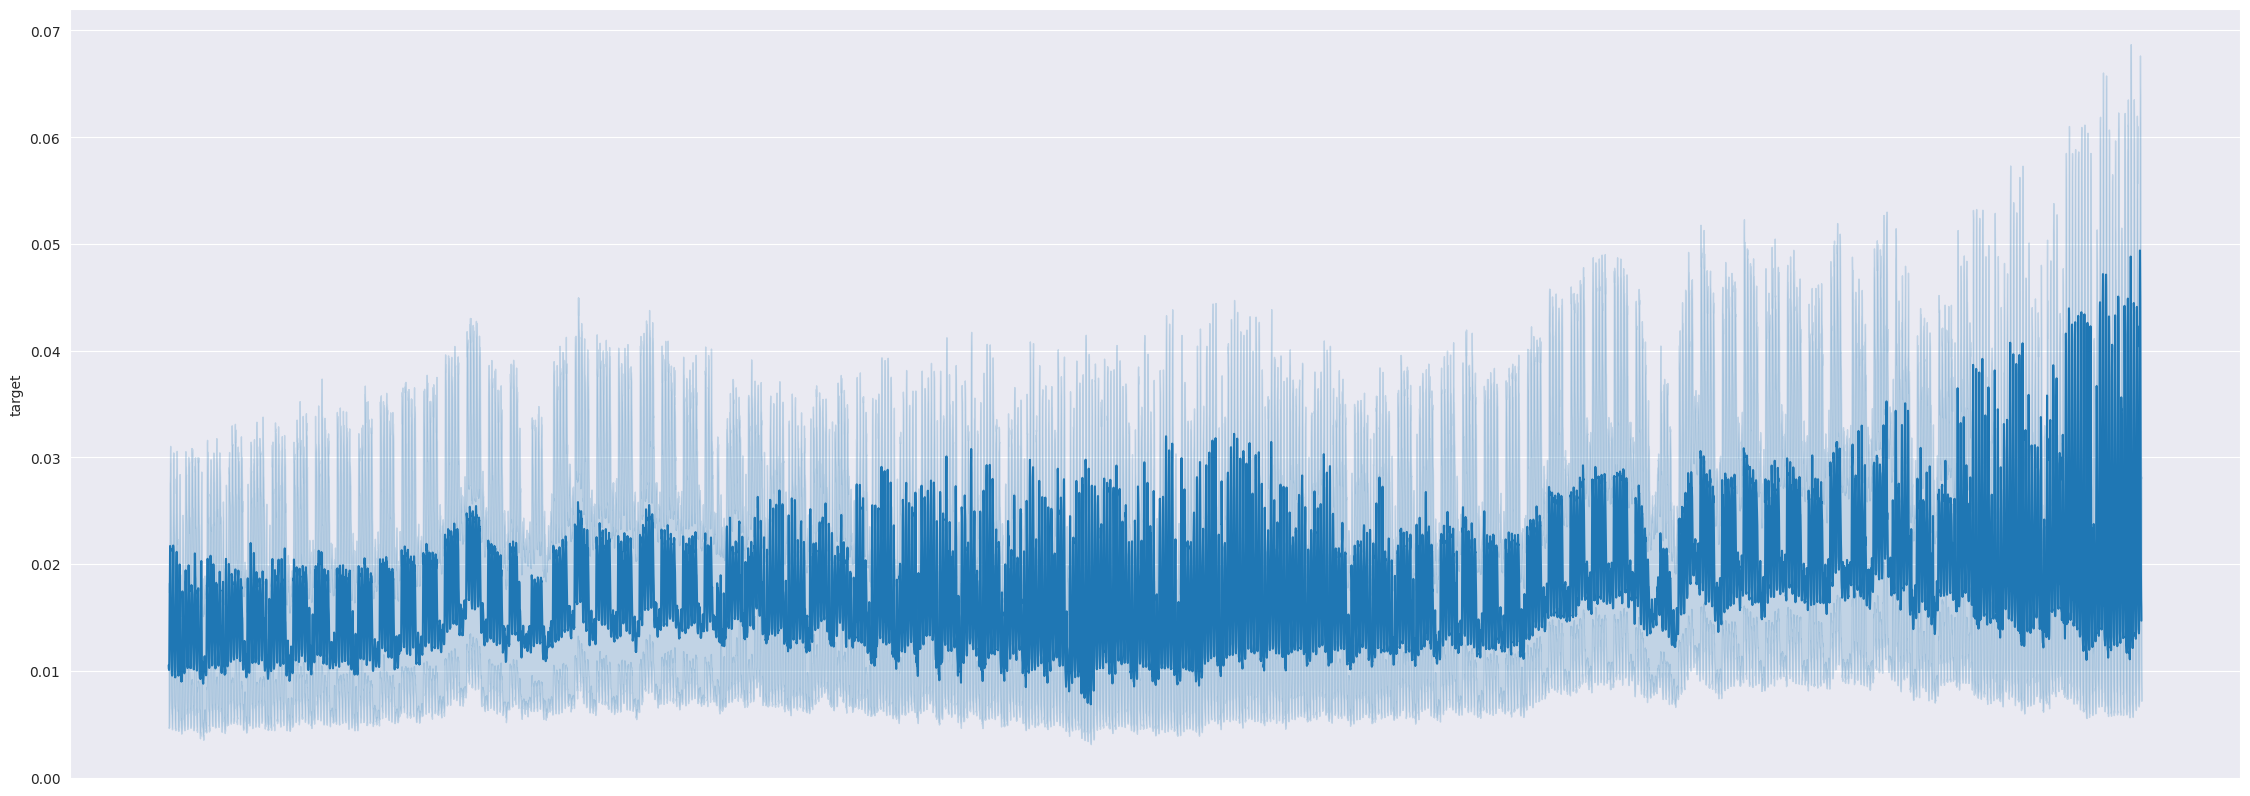

In [13]:
# Observando o comportamento da variável alvo ao longo do tempo.
plt.figure(figsize=(28, 10))
plt.xticks([])
sns.lineplot(x="datetime", y="target", data=df)

<Axes: xlabel='datetime', ylabel='target'>

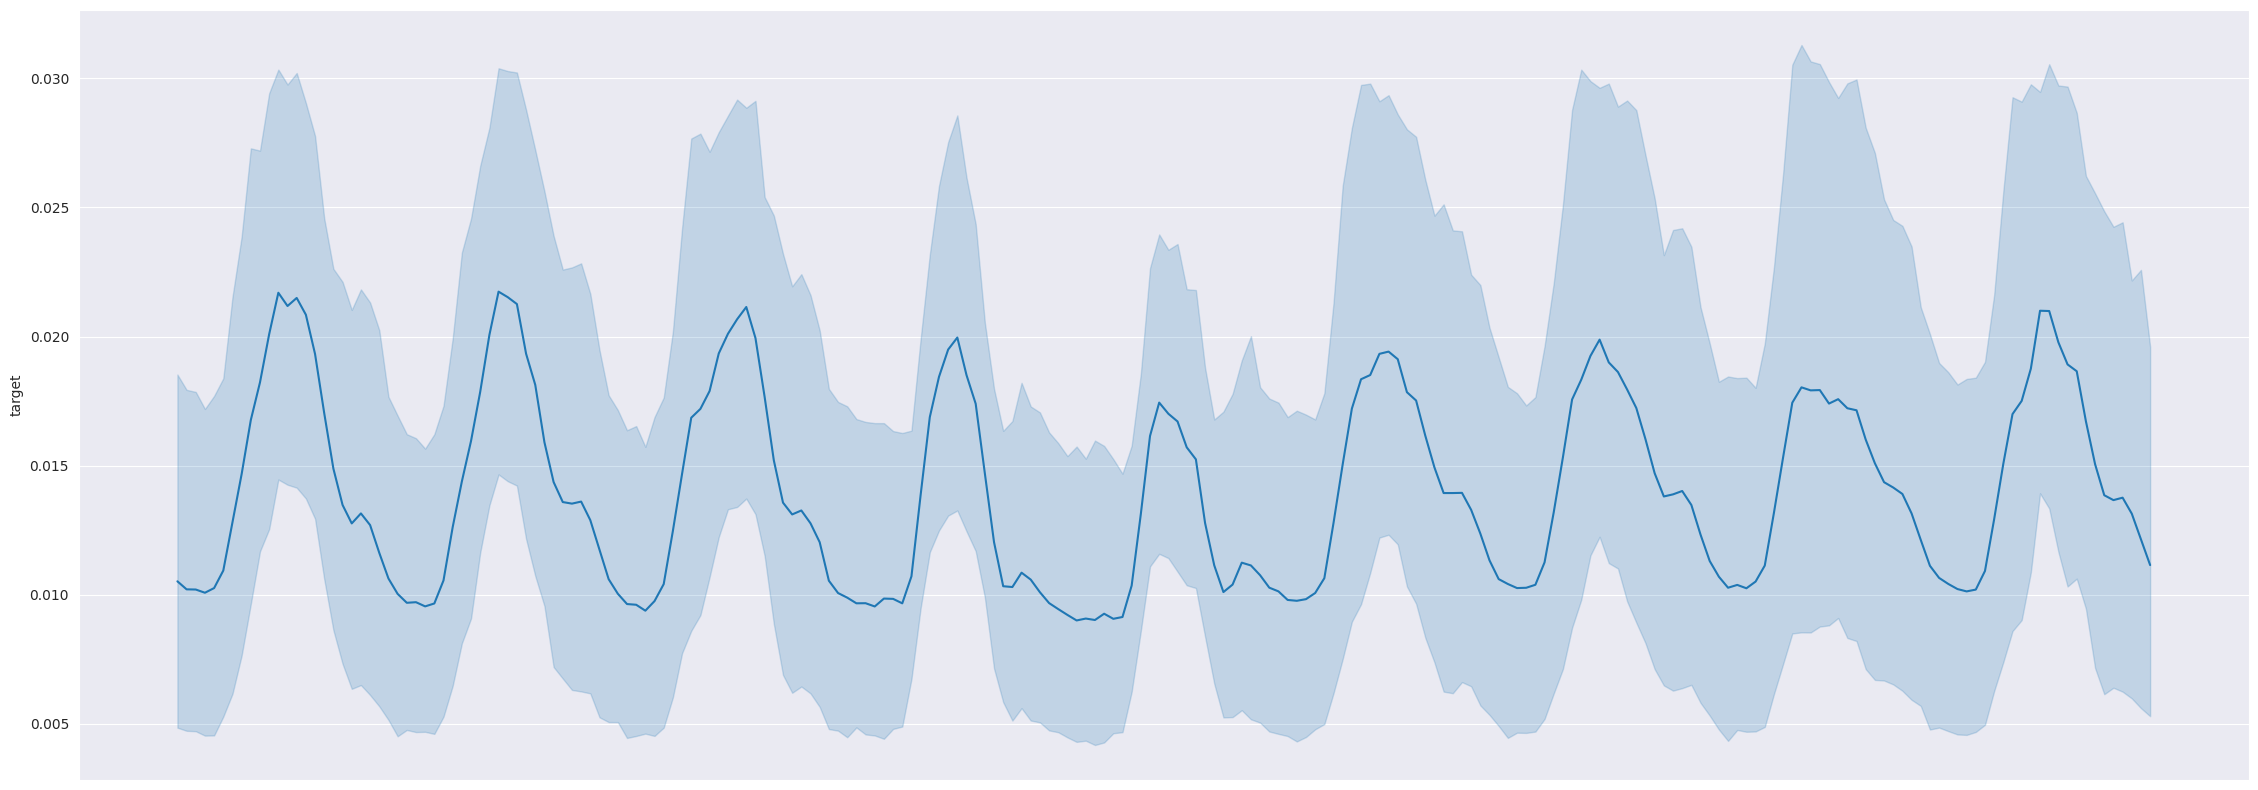

In [14]:
# O conjunto de dados é muito grande, então vamos observar apenas o comportamento da variável alvo entre os dias 01/09/2021 e 10/09/2021 para entender seu comportamento padrão.
plt.figure(figsize=(28, 10))
# remove xticks
plt.xticks([])
sns.lineplot(x="datetime", y="target", data=df[(df["datetime"] >= "2021-09-01") & (df["datetime"] <= "2021-09-10")])

- A partir dos gráficos acima, podemos observar um comportamento cíclico da variável alvo, que se repete a cada 24 horas, formando um padrão senoidal.
- Portanto, para melhorar a performance do modelo, vamos agrupar os dados por 3, 6, 12 ou 24 horas, considerando que o _dataset_ possui uma discretização por hora em sua representação.

#### Agrupamento de dados por 3, 6, 12 ou 24 horas.

In [15]:
df["datetime"].unique()

array(['2021-09-01 00:00:00', '2021-09-01 01:00:00',
       '2021-09-01 02:00:00', ..., '2023-05-31 21:00:00',
       '2023-05-31 22:00:00', '2023-05-31 23:00:00'], dtype=object)

In [16]:
# Convertendo o tipo da coluna datetime para datetime, antes de realizar o agrupamento.
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")

In [17]:
# Dividindo o dataset em dois, um para consumo e outro para produção.
consumption_df = df[df["is_consumption"] == 1]
consumption_df.head()

county  is_business  product_type    target  is_consumption   datetime  \
1       0            0             1  0.006240               1 2021-09-01   
3       0            0             2  0.001118               1 2021-09-01   
5       0            0             3  0.042432               1 2021-09-01   
7       0            1             0  0.003811               1 2021-09-01   
9       0            1             1  0.032413               1 2021-09-01   

   data_block_id  prediction_unit_id  
1              0                   0  
3              0                   1  
5              0                   2  
7              0                   3  
9              0                   4

In [18]:
production_df = df[df["is_consumption"] == 0]
production_df.head()

county  is_business  product_type    target  is_consumption   datetime  \
0       0            0             1  0.000046               0 2021-09-01   
2       0            0             2  0.000000               0 2021-09-01   
4       0            0             3  0.000188               0 2021-09-01   
6       0            1             0  0.000000               0 2021-09-01   
8       0            1             1  0.000000               0 2021-09-01   

   data_block_id  prediction_unit_id  
0              0                   0  
2              0                   1  
4              0                   2  
6              0                   3  
8              0                   4

In [19]:
# Agrupando os dados por 3 horas
consumption_df_resample = consumption_df[["datetime", "target"]].resample(f'3H', on='datetime').mean().reset_index()
consumption_df_resample.head()

datetime    target
0 2021-09-01 00:00:00  0.020610
1 2021-09-01 03:00:00  0.020839
2 2021-09-01 06:00:00  0.027414
3 2021-09-01 09:00:00  0.022557
4 2021-09-01 12:00:00  0.020526

In [20]:
production_df_resample = production_df[["datetime", "target"]].resample(f'3H', on='datetime').mean().reset_index()
production_df_resample.head()

datetime    target
0 2021-09-01 00:00:00  0.000006
1 2021-09-01 03:00:00  0.000004
2 2021-09-01 06:00:00  0.002076
3 2021-09-01 09:00:00  0.017449
4 2021-09-01 12:00:00  0.021821

In [21]:
consumption_df_resample["is_consumption"] = 1
production_df_resample["is_consumption"] = 0

In [22]:
new_df = pd.concat([consumption_df_resample, production_df_resample])
new_df = new_df.sort_values(by="datetime")
new_df

datetime    target  is_consumption
0    2021-09-01 00:00:00  0.020610               1
0    2021-09-01 00:00:00  0.000006               0
1    2021-09-01 03:00:00  0.000004               0
1    2021-09-01 03:00:00  0.020839               1
2    2021-09-01 06:00:00  0.027414               1
...                  ...       ...             ...
5101 2023-05-31 15:00:00  0.022549               1
5102 2023-05-31 18:00:00  0.012558               0
5102 2023-05-31 18:00:00  0.027968               1
5103 2023-05-31 21:00:00  0.031054               1
5103 2023-05-31 21:00:00  0.000498               0

[10208 rows x 3 columns]

<Axes: xlabel='datetime', ylabel='target'>

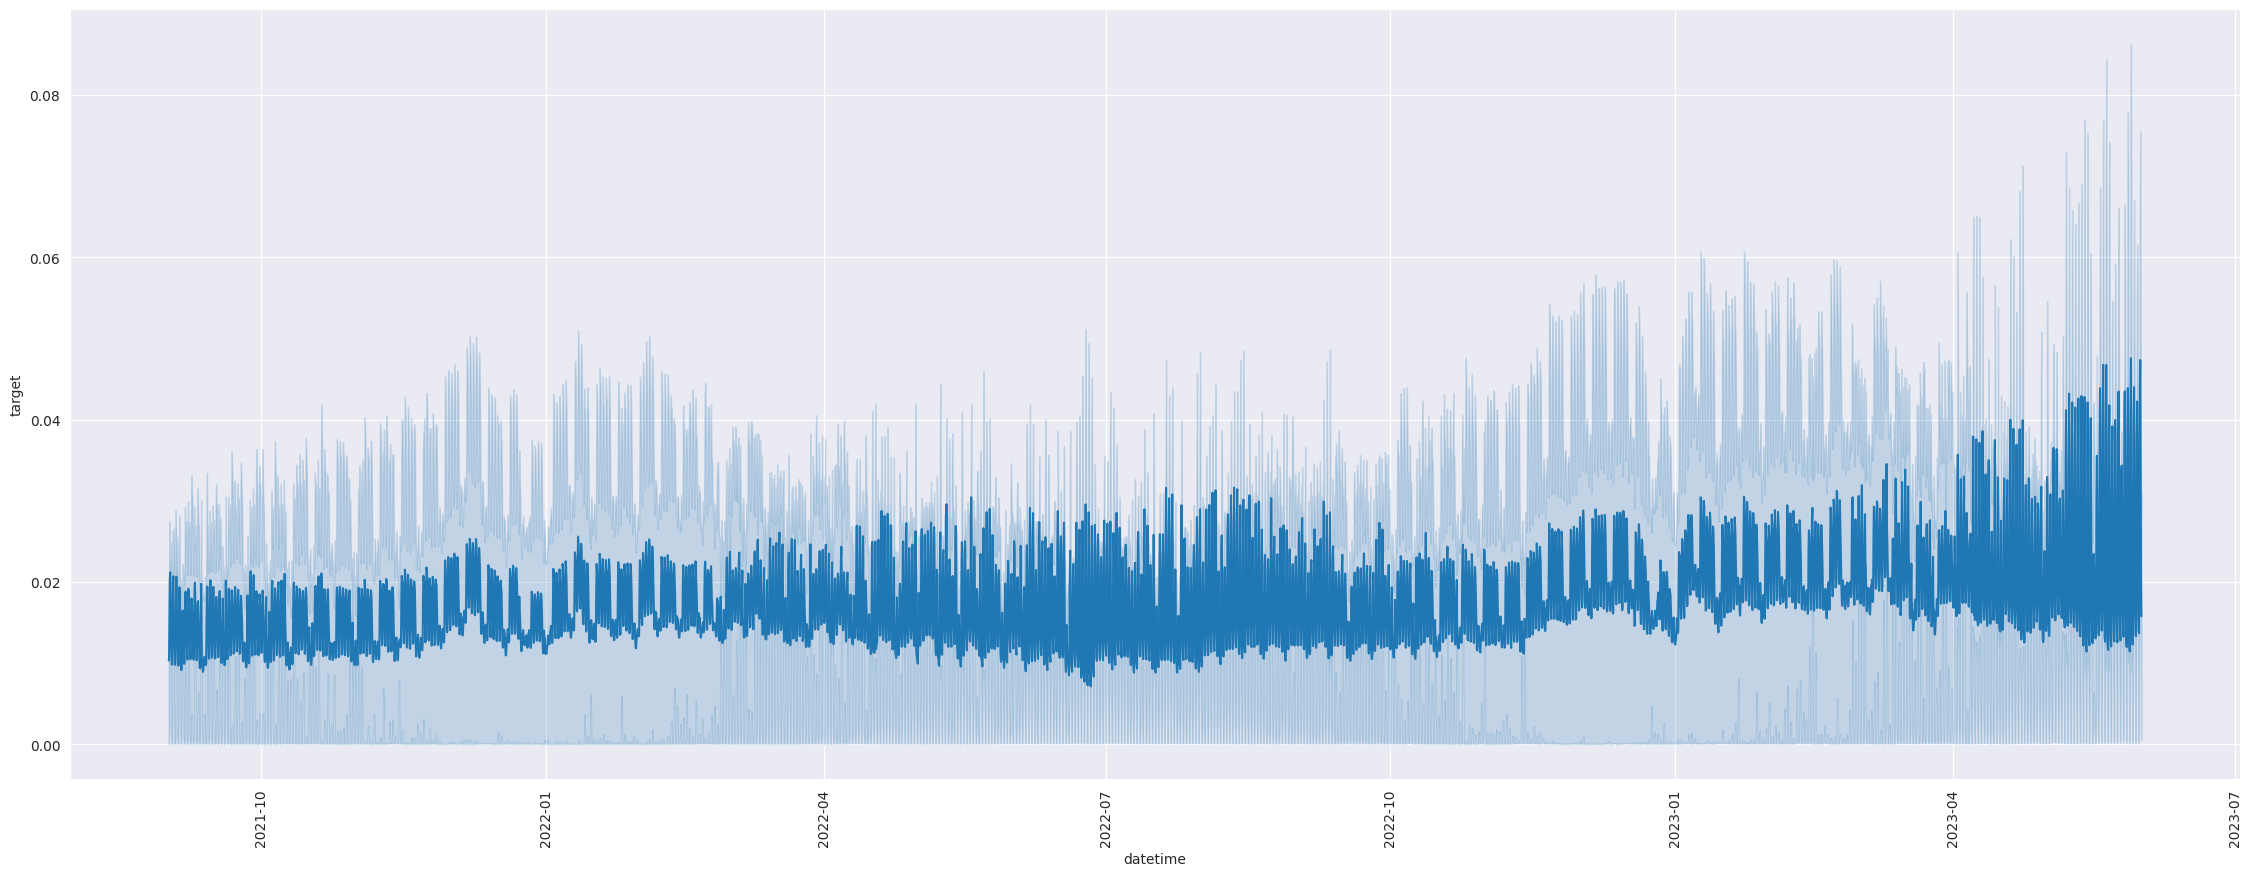

In [23]:
plt.figure(figsize=(28, 10))
plt.xticks(rotation=90)
sns.lineplot(x="datetime", y="target", data=new_df)

Observando o gráfico, podemos identificar que o padrão continua e não se perdeu informação com o agrupamento. Vamos fazer o mesmo para 6, 12 e 24 horas e observar o comportamento.

<Axes: xlabel='datetime', ylabel='target'>

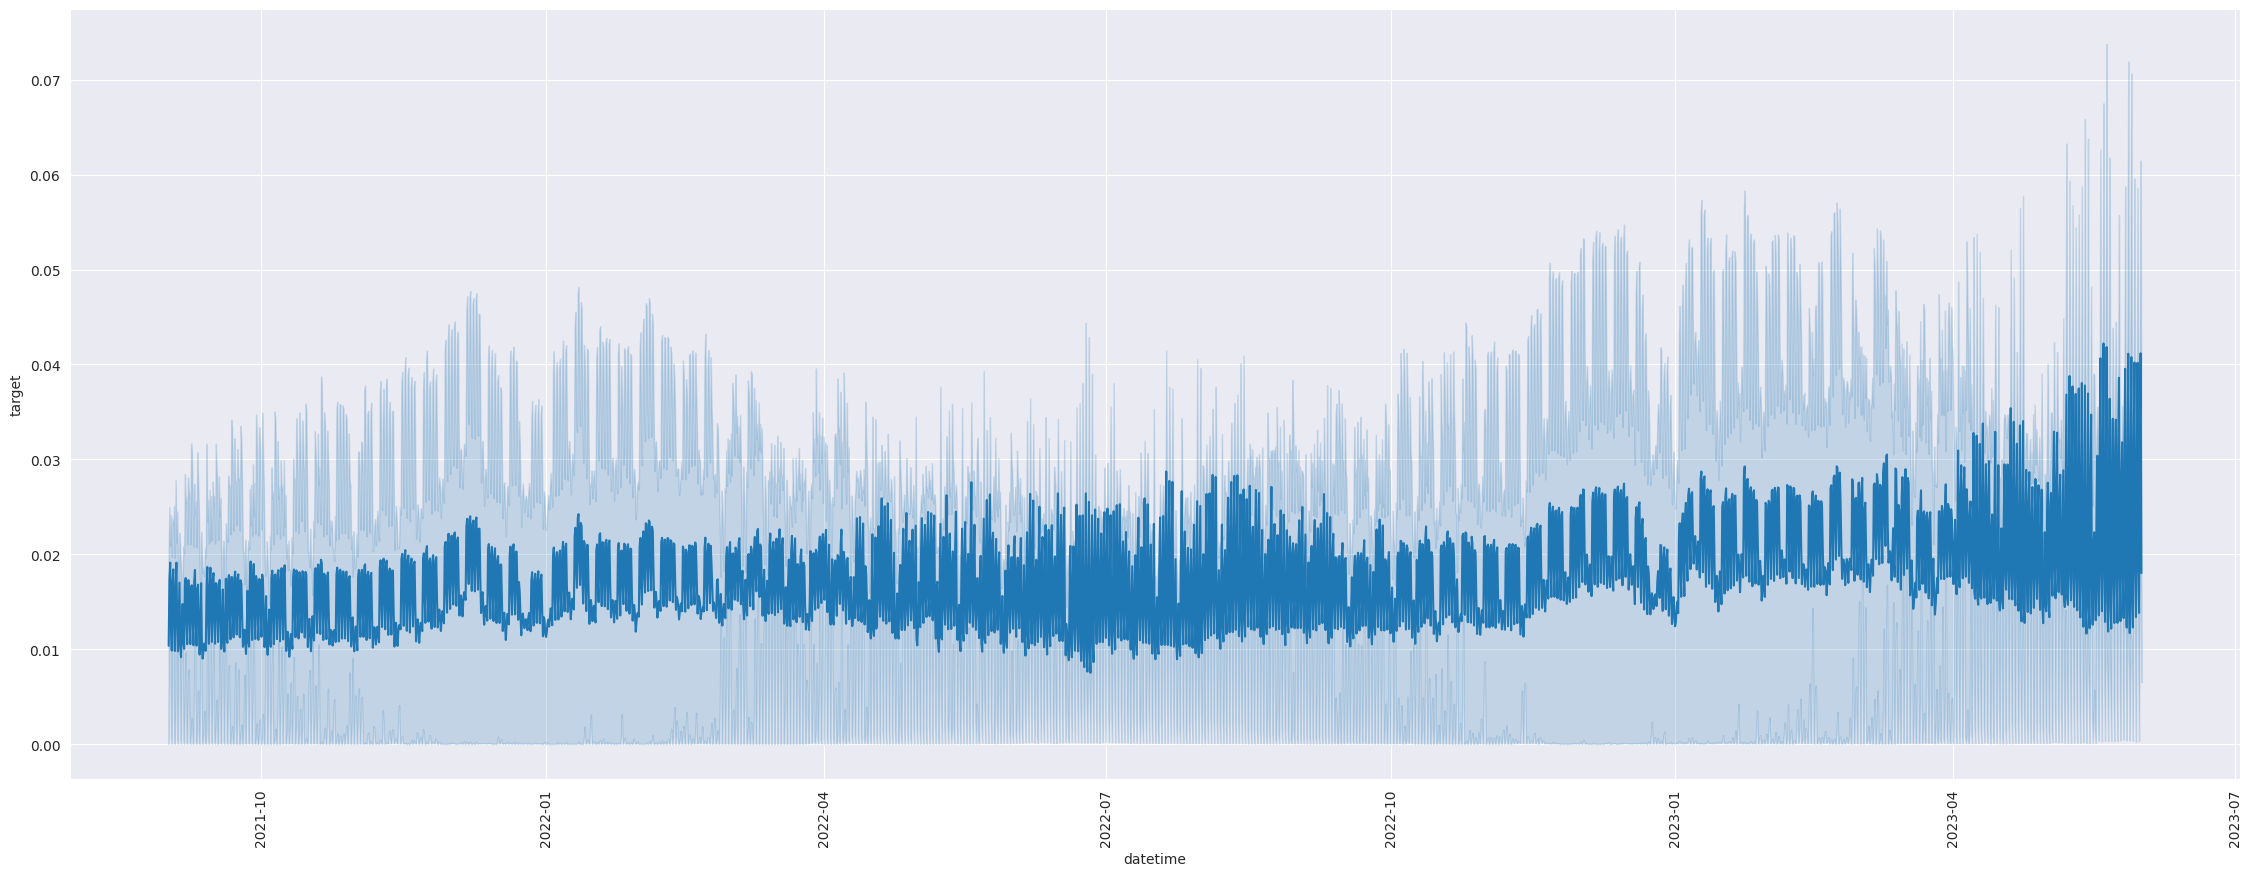

In [24]:
consumption_df_resample = consumption_df[["datetime", "target"]].resample(f'6H', on='datetime').mean().reset_index()
production_df_resample = production_df[["datetime", "target"]].resample(f'6H', on='datetime').mean().reset_index()
consumption_df_resample["is_consumption"] = 1
production_df_resample["is_consumption"] = 0
new_df = pd.concat([consumption_df_resample, production_df_resample])
new_df = new_df.sort_values(by="datetime")
plt.figure(figsize=(28, 10))
plt.xticks(rotation=90)
sns.lineplot(x="datetime", y="target", data=new_df)

<Axes: xlabel='datetime', ylabel='target'>

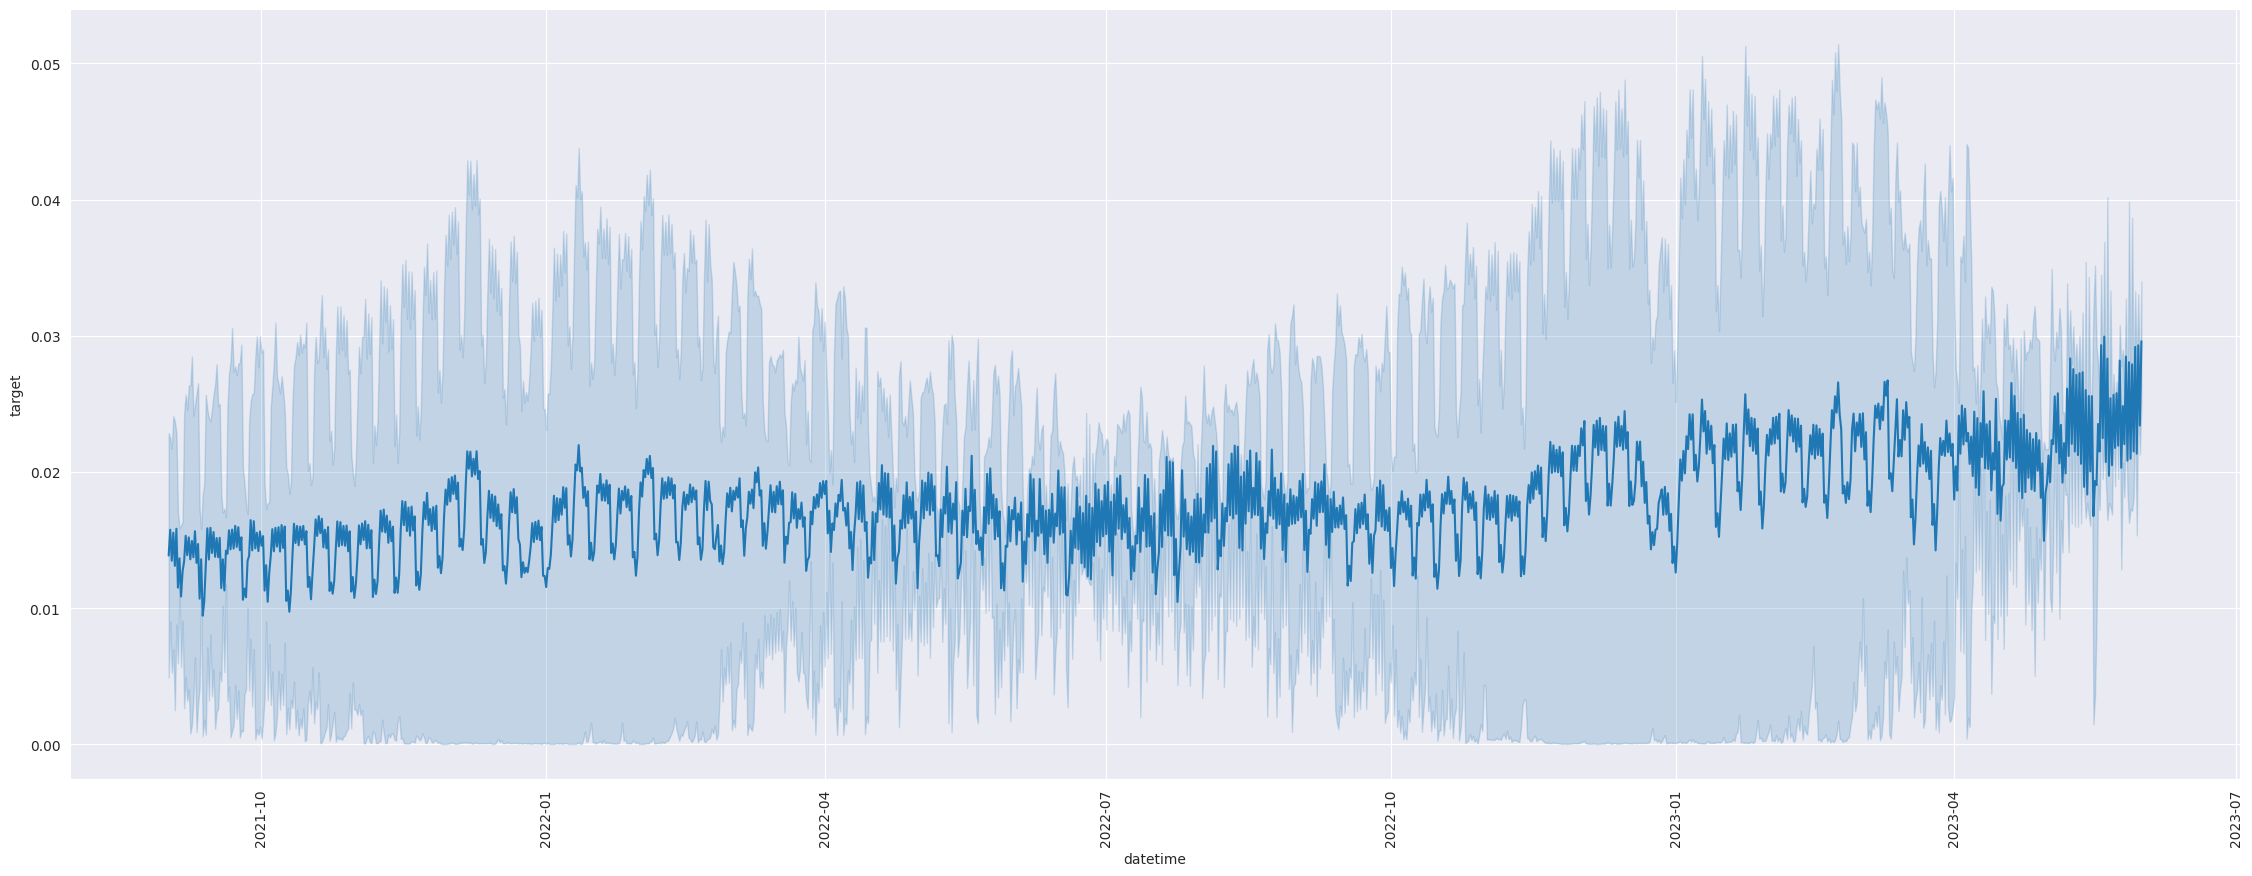

In [25]:
consumption_df_resample = consumption_df[["datetime", "target"]].resample(f'12H', on='datetime').mean().reset_index()
production_df_resample = production_df[["datetime", "target"]].resample(f'12H', on='datetime').mean().reset_index()
consumption_df_resample["is_consumption"] = 1
production_df_resample["is_consumption"] = 0
new_df = pd.concat([consumption_df_resample, production_df_resample])
new_df = new_df.sort_values(by="datetime")
plt.figure(figsize=(28, 10))
plt.xticks(rotation=90)
sns.lineplot(x="datetime", y="target", data=new_df)

<Axes: xlabel='datetime', ylabel='target'>

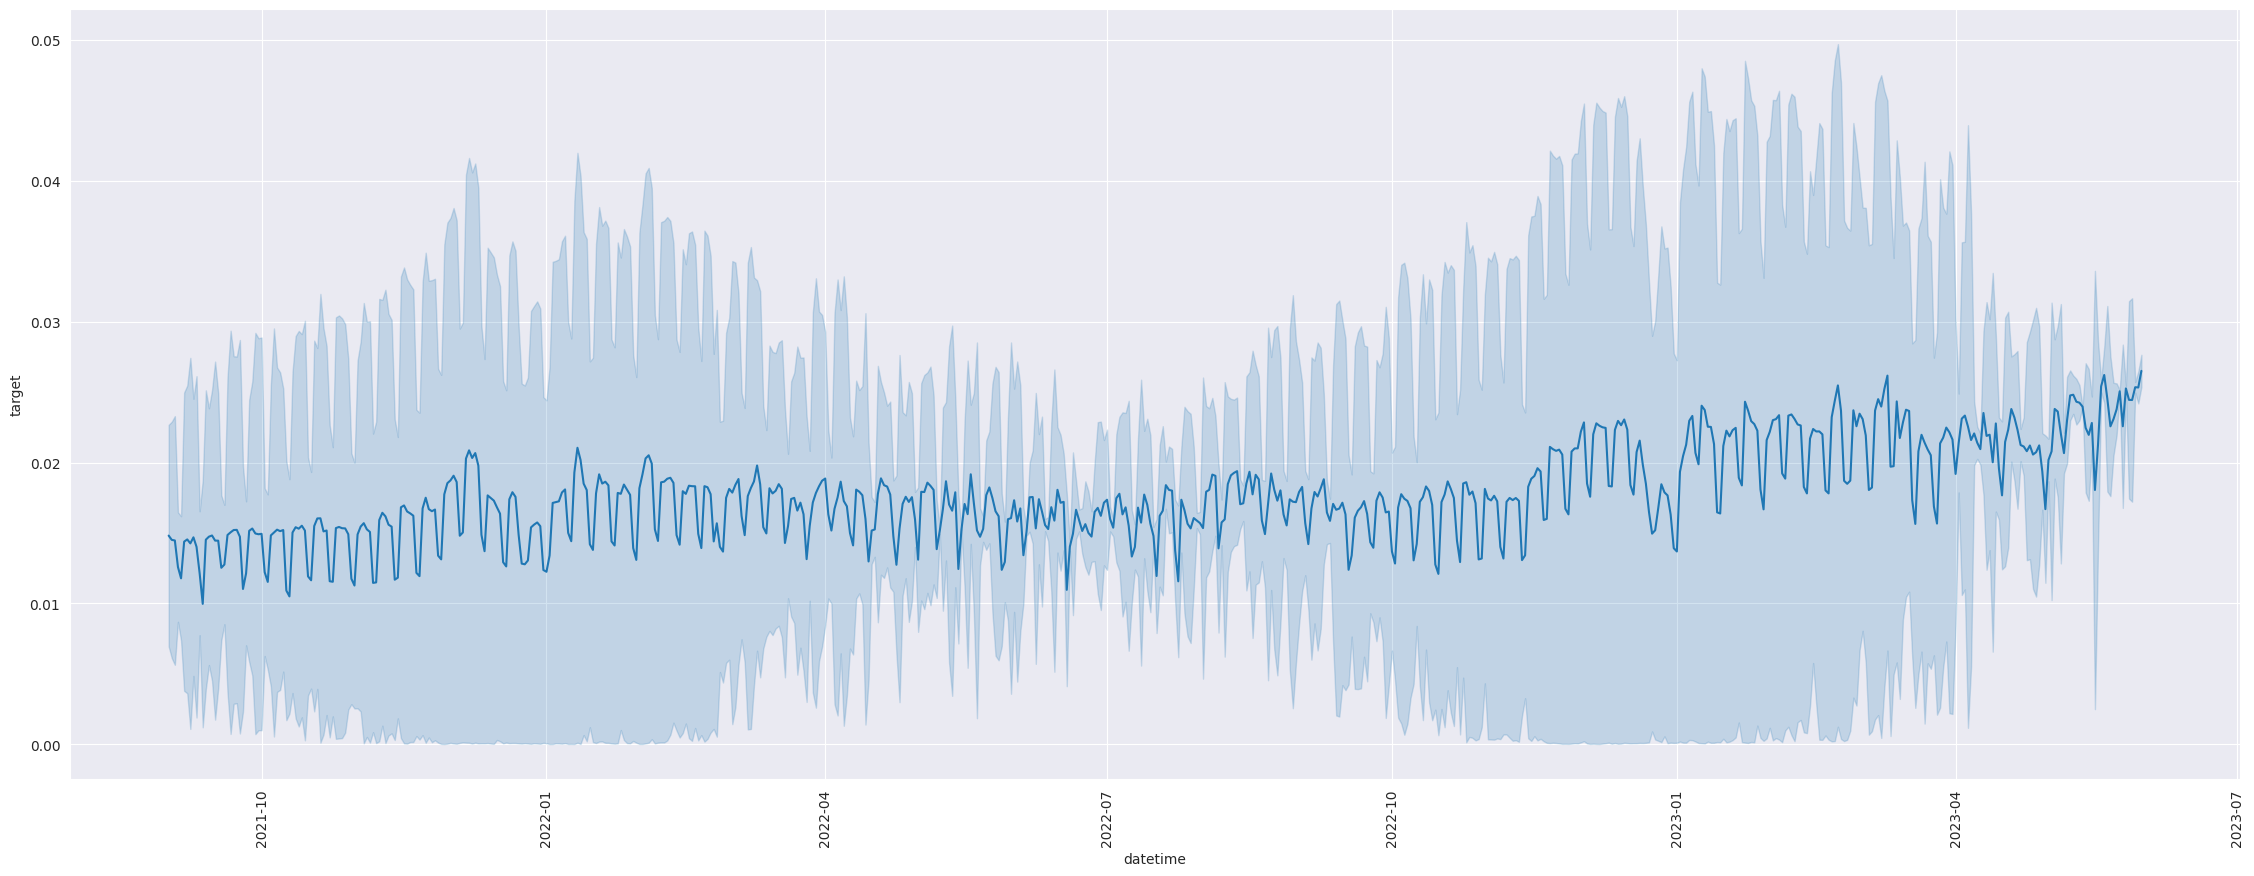

In [26]:
consumption_df_resample = consumption_df[["datetime", "target"]].resample(f'24H', on='datetime').mean().reset_index()
production_df_resample = production_df[["datetime", "target"]].resample(f'24H', on='datetime').mean().reset_index()
consumption_df_resample["is_consumption"] = 1
production_df_resample["is_consumption"] = 0
new_df = pd.concat([consumption_df_resample, production_df_resample])
new_df = new_df.sort_values(by="datetime")
plt.figure(figsize=(28, 10))
plt.xticks(rotation=90)
sns.lineplot(x="datetime", y="target", data=new_df)

Observando os gráficos gerados para cada agrupamento, é identificado que o comportamento se perde a partir das 12 horas agrupadas. Portanto, para facilitar a performance dos modelos e ainda assim obter um resultado satisfatório, vamos agrupar os dados por 6 horas.

<Axes: xlabel='datetime', ylabel='target'>

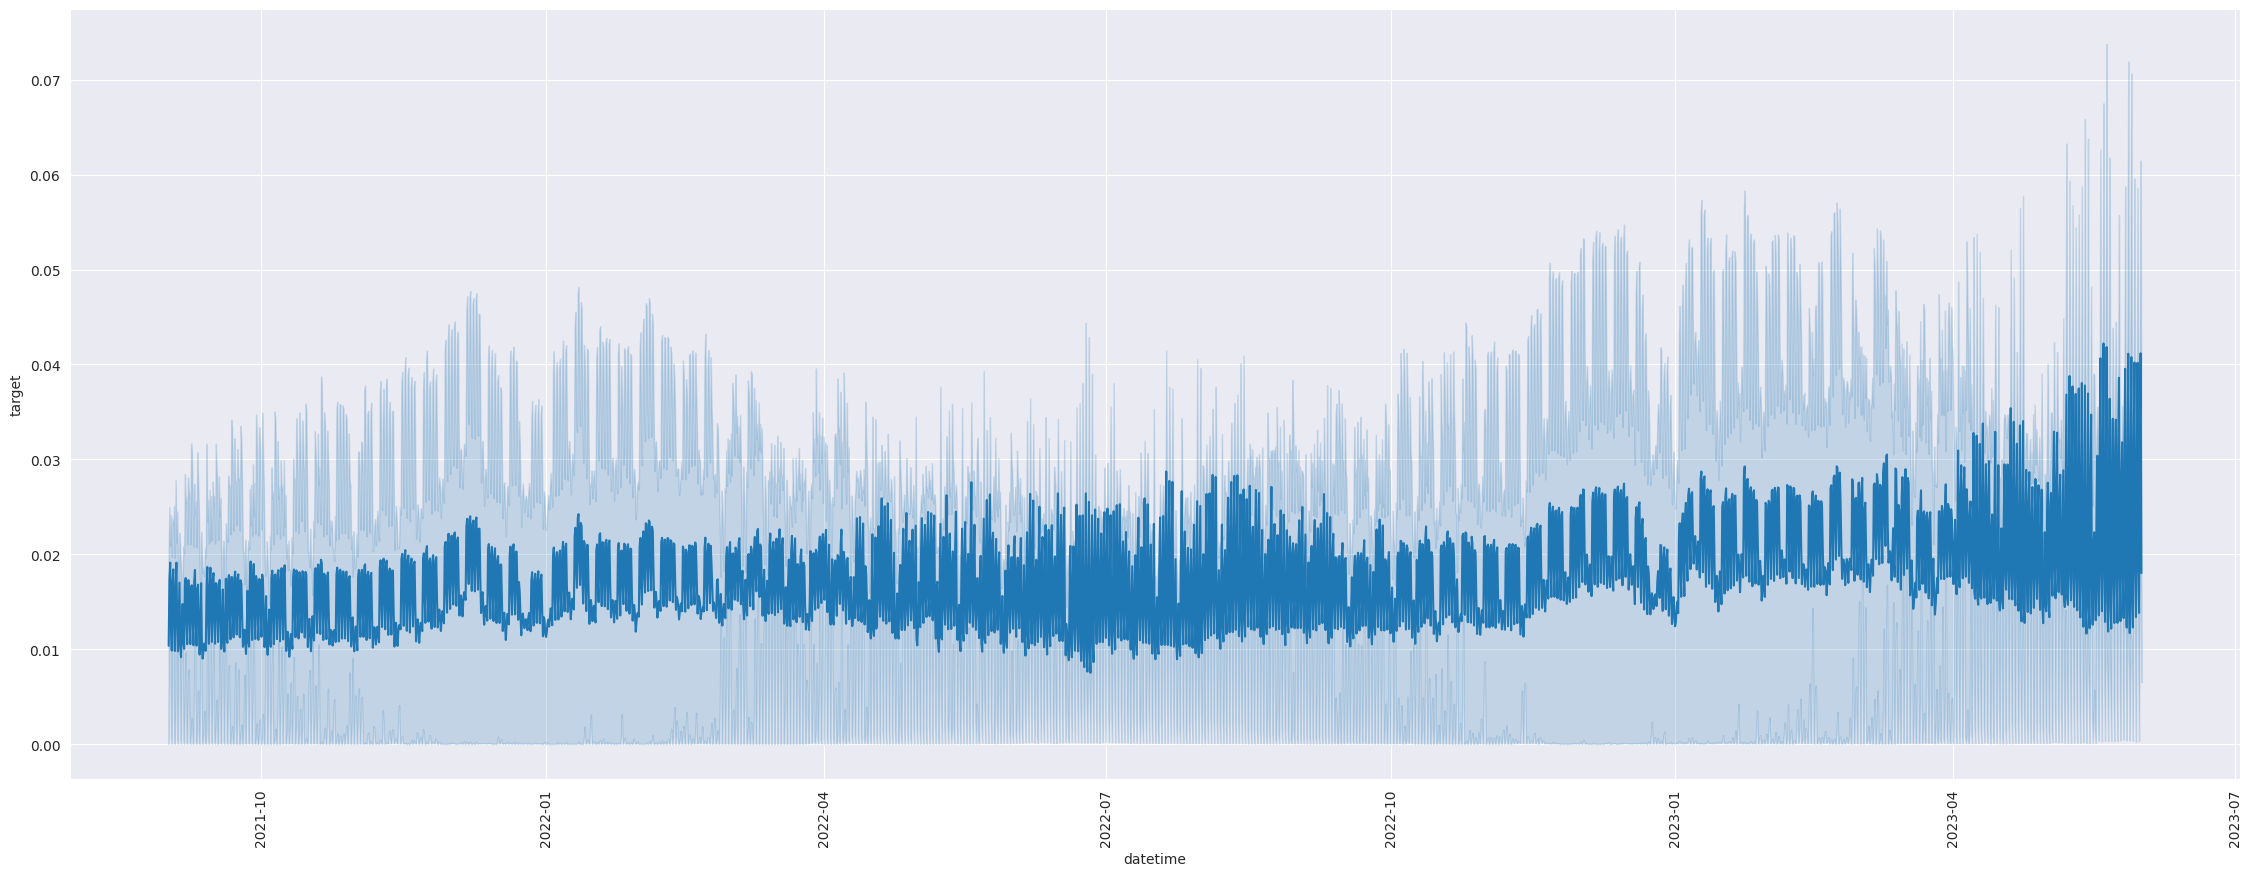

In [27]:
# Processando novamente para guardar o resultado em new_df
consumption_df_resample = consumption_df[["datetime", "target"]].resample(f'6H', on='datetime').mean().reset_index()
production_df_resample = production_df[["datetime", "target"]].resample(f'6H', on='datetime').mean().reset_index()
consumption_df_resample["is_consumption"] = 1
production_df_resample["is_consumption"] = 0
new_df = pd.concat([consumption_df_resample, production_df_resample])
new_df = new_df.sort_values(by="datetime")
plt.figure(figsize=(28, 10))
plt.xticks(rotation=90)
sns.lineplot(x="datetime", y="target", data=new_df)

<Axes: xlabel='datetime', ylabel='target'>

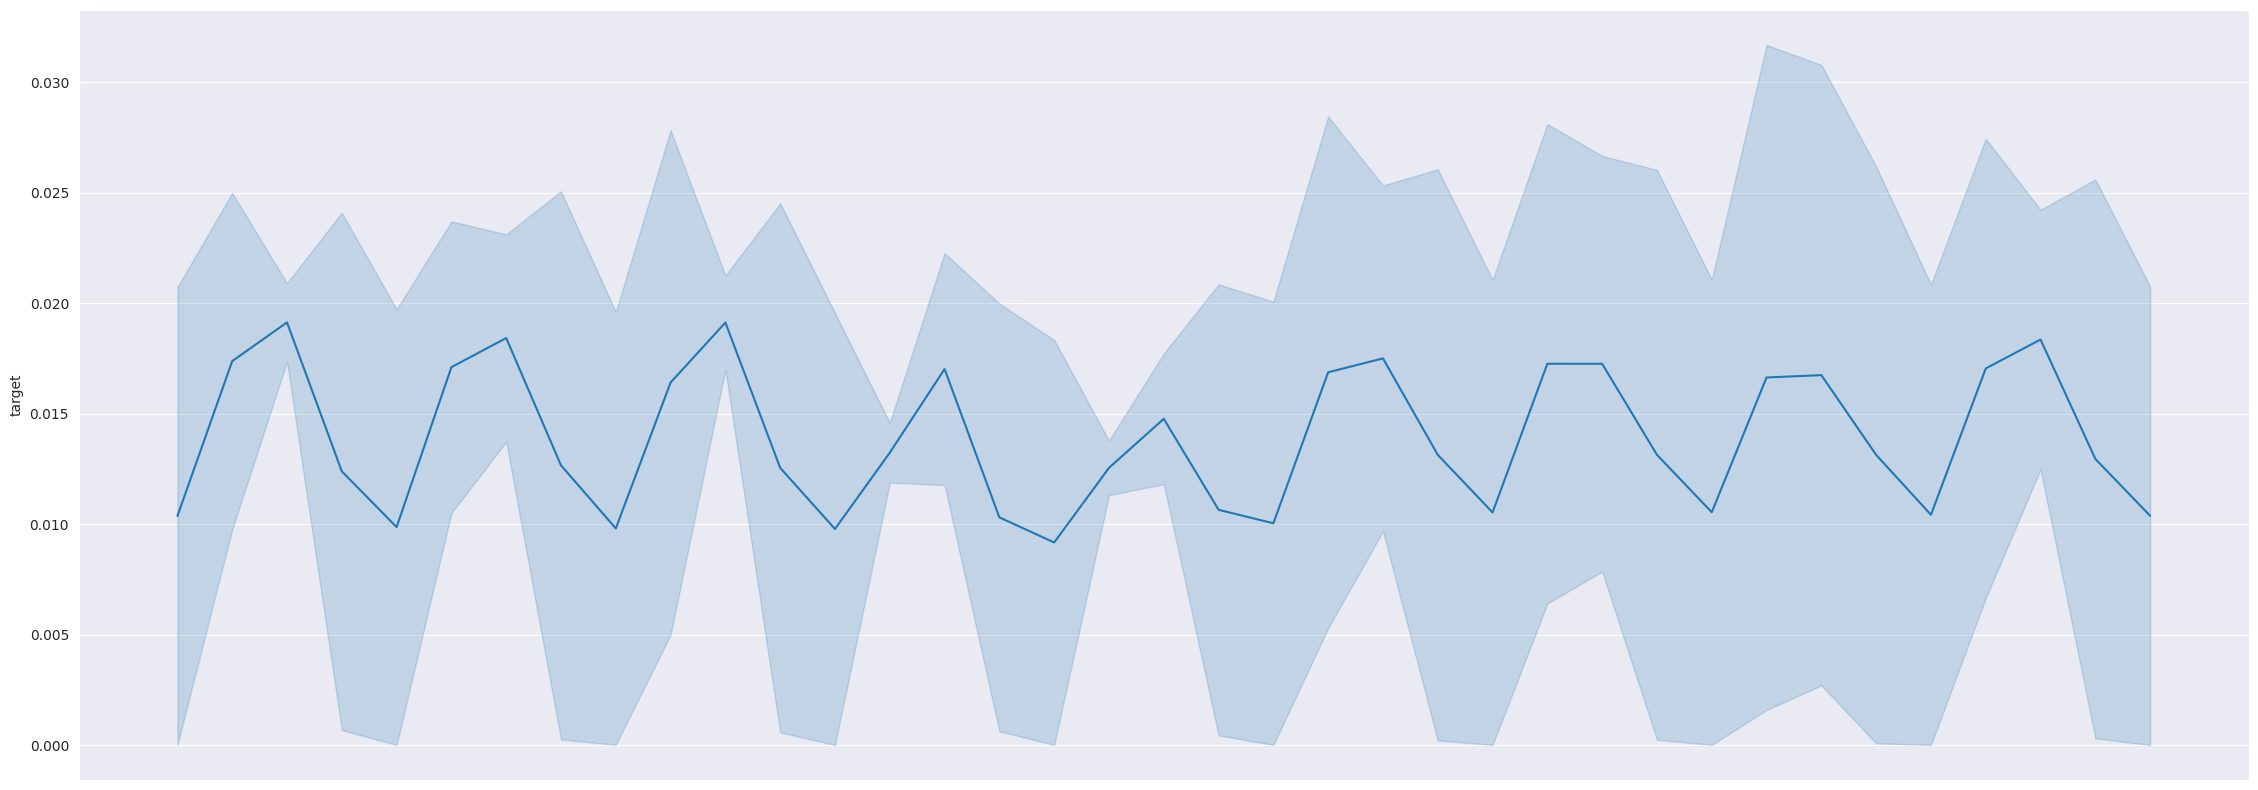

In [28]:
# Confirmando o comportamento esperado, é identificado que o padrão se repete a cada 6 horas.
plt.figure(figsize=(28, 10))
plt.xticks([])
sns.lineplot(x="datetime", y="target", data=new_df[(new_df["datetime"] >= "2021-09-01") & (new_df["datetime"] <= "2021-09-10")])

Agora que temos os dados agrupados por 6 horas, vamos observar a decomposição da série temporal.

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
# A função vai auxiliar para receber um DataFrame e o período que será mostrado na decomposição.
def plot_decomposition(new_df, periodo: int):
    decomposition = seasonal_decompose(new_df["target"], model='additive', period=periodo)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plotando as componentes
    plt.figure(figsize=(20, 8))

    plt.subplot(411)
    plt.plot(new_df["target"], label='Original')
    plt.legend(loc='best')
    plt.title('Série Temporal Original')

    plt.subplot(412)
    plt.plot(trend, label='Tendência')
    plt.legend(loc='best')
    plt.title('Tendência')

    plt.subplot(413)
    plt.plot(seasonal, label='Sazonalidade')
    plt.legend(loc='best')
    plt.title('Sazonalidade')

    plt.subplot(414)
    plt.plot(residual, label='Ruído')
    plt.legend(loc='best')
    plt.title('Ruído')

    plt.tight_layout()
    plt.show()

Para cada decomposição, o período passado se faz necessário para que a função consiga identificar o padrão e realizar a decomposição corretamente. Portanto, vamos observar o comportamento da decomposição para os períodos de 6 meses, 1 mês e 1 semana.

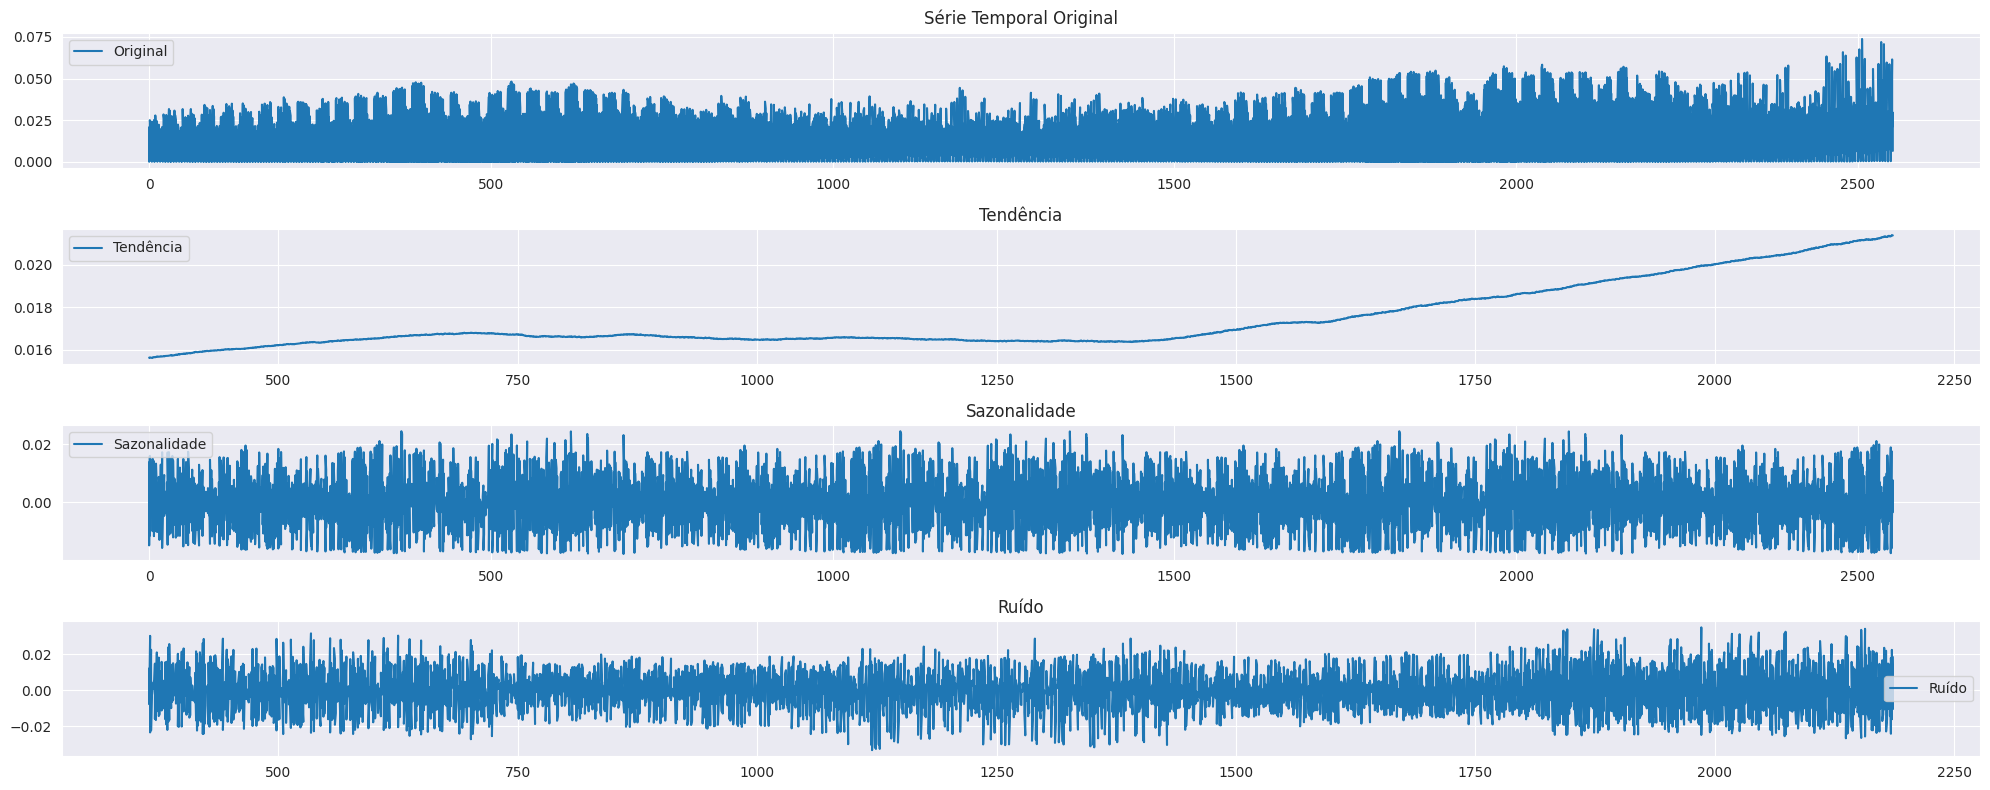

In [31]:
plot_decomposition(new_df=new_df, periodo=int((24 / 3) * (365 / 2))) # 6 meses

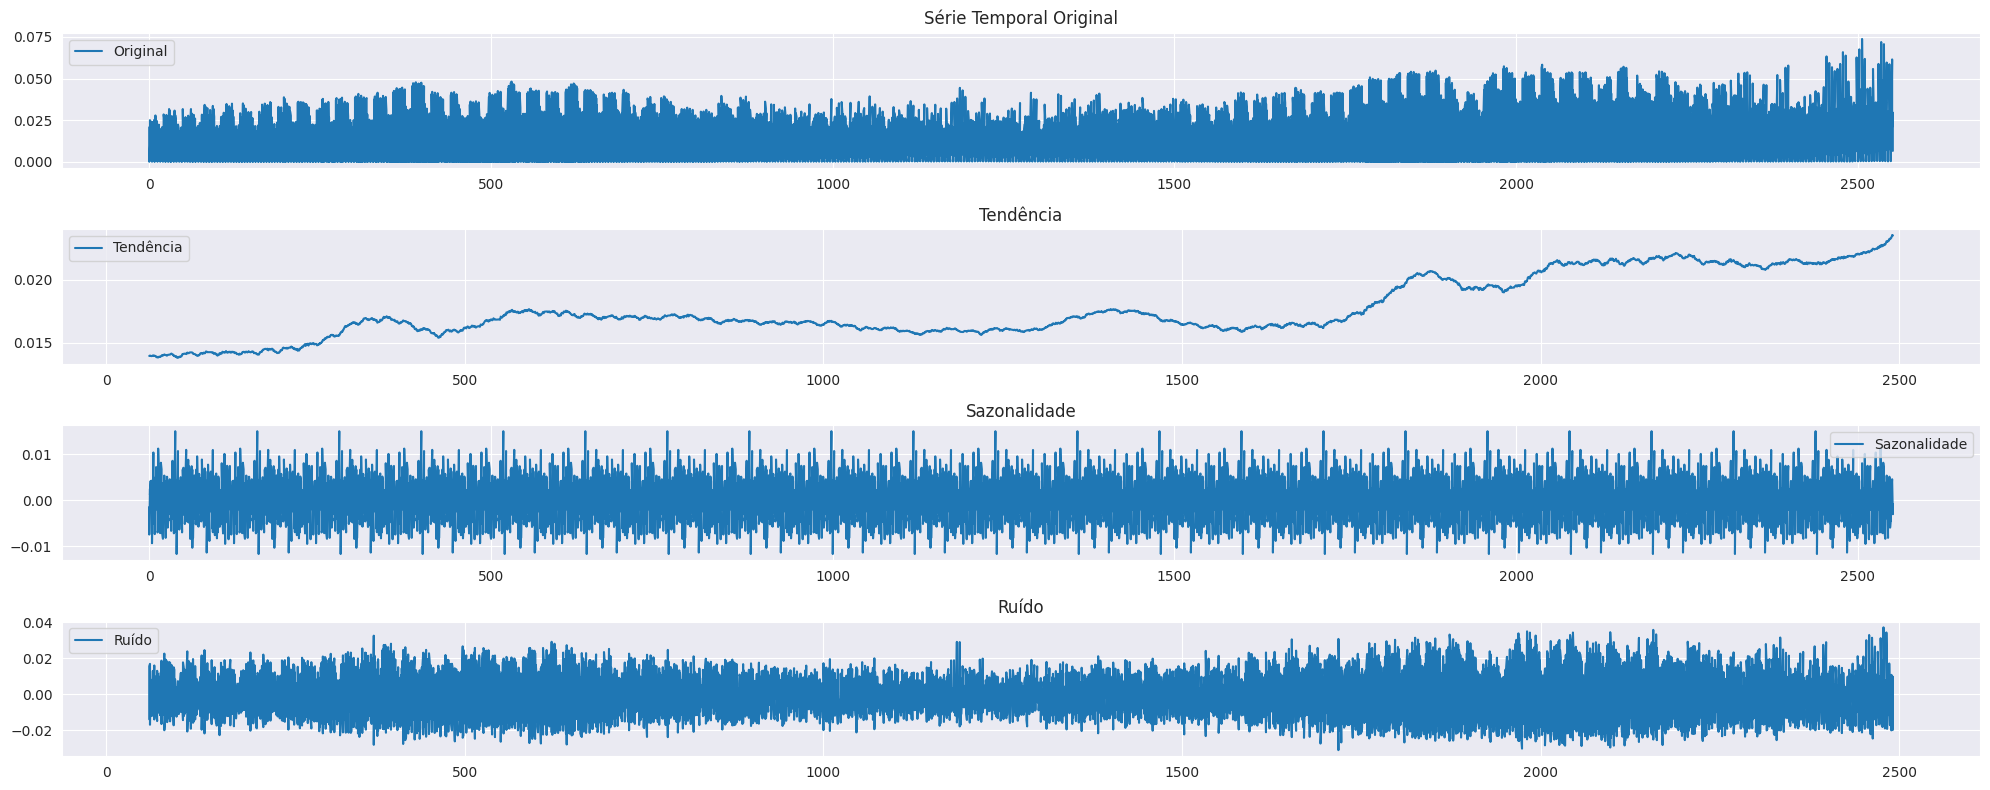

In [32]:
plot_decomposition(new_df=new_df, periodo=int(30 * (24 / 3))) # 1 mês

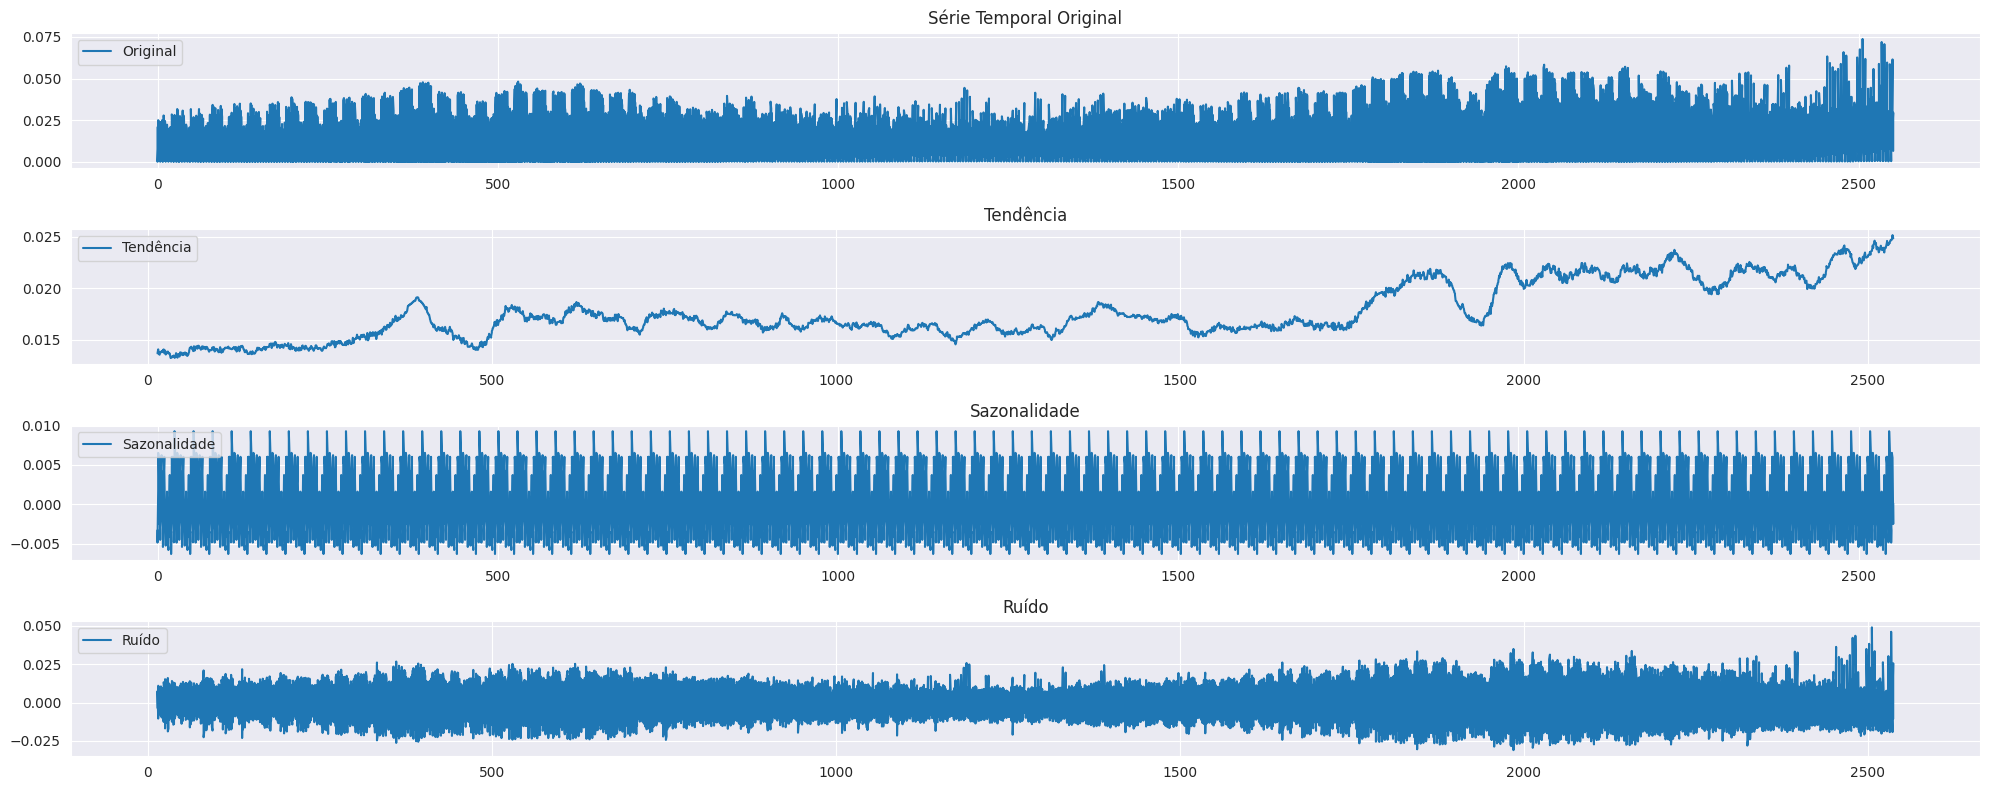

In [33]:
plot_decomposition(new_df=new_df, periodo=int(7 * (24 / 3))) # 1 semana

In [34]:
train_df = new_df[:int(len(new_df) * 0.8)]
test_df = new_df[int(len(new_df) * 0.8):]

In [35]:
train_df

datetime    target  is_consumption
0    2021-09-01 00:00:00  0.020725               1
0    2021-09-01 00:00:00  0.000005               0
1    2021-09-01 06:00:00  0.009762               0
1    2021-09-01 06:00:00  0.024986               1
2    2021-09-01 12:00:00  0.020904               1
...                  ...       ...             ...
2039 2023-01-23 18:00:00  0.000065               0
2039 2023-01-23 18:00:00  0.044268               1
2040 2023-01-24 00:00:00  0.000061               0
2040 2023-01-24 00:00:00  0.035407               1
2041 2023-01-24 06:00:00  0.000145               0

[4083 rows x 3 columns]

In [36]:
test_df

datetime    target  is_consumption
2041 2023-01-24 06:00:00  0.055518               1
2042 2023-01-24 12:00:00  0.055755               1
2042 2023-01-24 12:00:00  0.000135               0
2043 2023-01-24 18:00:00  0.042429               1
2043 2023-01-24 18:00:00  0.000056               0
...                  ...       ...             ...
2549 2023-05-31 06:00:00  0.023782               1
2550 2023-05-31 12:00:00  0.061475               0
2550 2023-05-31 12:00:00  0.020878               1
2551 2023-05-31 18:00:00  0.029511               1
2551 2023-05-31 18:00:00  0.006528               0

[1021 rows x 3 columns]

In [33]:
from sktime.forecasting.compose import make_reduction

# Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor
# KNN
from sklearn.neighbors import KNeighborsRegressor
# MLP
from sklearn.neural_network import MLPRegressor
# SVR
from sklearn.svm import SVR
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
# MSE
from sklearn.metrics import mean_squared_error
# MAE
from sklearn.metrics import mean_absolute_error

In [35]:
train_df.index = pd.RangeIndex(len(train_df.index))
test_df.index = pd.RangeIndex(len(test_df.index))

In [36]:
model = make_reduction(
    DecisionTreeRegressor(criterion="squared_error", max_depth=20),
    window_length=10 * 4,
    strategy="recursive"
).fit(train_df["target"])
y_pred = model.predict(np.arange(1, len(test_df) + 1))
print(mean_squared_error(test_df["target"], y_pred))
print(mean_squared_error(test_df["target"], y_pred, squared=False))
print(mean_absolute_error(test_df["target"], y_pred))

139681.8740073696
373.7403831637272
300.64828992576065


In [37]:
results = pd.DataFrame(columns=["model", "configuration", "mse", "rmse", "mae"])

models = [
    DecisionTreeRegressor(criterion="squared_error", max_depth=40), DecisionTreeRegressor(criterion="absolute_error", max_depth=80),
    KNeighborsRegressor(n_neighbors=10, metric="minkowski"), KNeighborsRegressor(n_neighbors=20, metric="minkowski"),
    MLPRegressor(learning_rate="constant", batch_size=100, activation="relu"), MLPRegressor(learning_rate="adaptive", batch_size=200, activation="logistic"),
    SVR(kernel="linear", C=1.0, gamma="auto"), SVR(kernel="sigmoid", C=2.0, gamma="scale"),
    RandomForestRegressor(max_depth=20, criterion="poisson"), GradientBoostingRegressor(criterion="squared_error", max_depth=50)
]

mse = list()
rmse = list()
mae = list()

for model in models:
    mse_temp = list()
    rmse_temp = list()
    mae_temp = list()
    for _ in range(10):
        model_ = make_reduction(
            model,
            window_length=10 * 4,
            strategy="recursive"
        )
        model_.fit(train_df["target"])
        y_pred = model_.predict(np.arange(1, len(test_df) + 1))
        mse_temp.append(mean_squared_error(test_df["target"], y_pred))
        rmse_temp.append(mean_squared_error(test_df["target"], y_pred, squared=False))
        mae_temp.append(mean_absolute_error(test_df["target"], y_pred))

    mse.append(np.mean(mse_temp))
    rmse.append(np.mean(rmse_temp))
    mae.append(np.mean(mae_temp))

results["model"] = models
results["configuration"] = [
    "criterion=squared_error, max_depth=20", "criterion=absolute_error, max_depth=40",
    "n_neighbors=5, metric=minkowski", "n_neighbors=10, metric=precomputed",
    "learning_rate=constant, batch_size=100, activation=relu", "learning_rate=adaptive, batch_size=200, activation=logistic",
    "kernel=linear, C=1.0, gamma=auto", "kernel=sigmoid, C=2.0, gamma=scale",
    "random_state=42, max_depth=20, criterion=poisson", "criterion=squared_error, max_depth=20"
]
results["mse"] = mse
results["rmse"] = rmse
results["mae"] = mae

/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/sit

In [38]:
results

model  \
0                DecisionTreeRegressor(max_depth=40)   
1  DecisionTreeRegressor(criterion='absolute_erro...   
2                KNeighborsRegressor(n_neighbors=10)   
3                KNeighborsRegressor(n_neighbors=20)   
4                       MLPRegressor(batch_size=100)   
5  MLPRegressor(activation='logistic', batch_size...   
6                 SVR(gamma='auto', kernel='linear')   
7                       SVR(C=2.0, kernel='sigmoid')   
8  RandomForestRegressor(criterion='poisson', max...   
9  GradientBoostingRegressor(criterion='squared_e...   

                                       configuration            mse  \
0              criterion=squared_error, max_depth=20   1.435215e+05   
1             criterion=absolute_error, max_depth=40   1.410891e+05   
2                    n_neighbors=5, metric=minkowski   8.738133e+04   
3                 n_neighbors=10, metric=precomputed   9.064544e+04   
4  learning_rate=constant, batch_size=100, activa...  3.067546e+136   
5  learning_rate=adaptive, batch_size=200, activa...   9.124009e+04   
6                   kernel=linear, C=1.0, gamma=auto   8.627979e+04   
7                 kernel=sigmoid, C=2.0, gamma=scale   8.160526e+04   
8   random_state=42, max_depth=20, criterion=poisson   7.902901e+04   
9              criterion=squared_error, max_depth=20   1.073397e+05   

           rmse           mae  
0  3.785749e+02  3.023040e+02  
1  3.755273e+02  3.000286e+02  
2  2.956033e+02  2.499135e+02  
3  3.010738e+02  2.602469e+02  
4  5.538543e+67  5.181336e+66  
5  3.020448e+02  2.638850e+02  
6  2.937342e+02  2.596869e+02  
7  2.856663e+02  2.541999e+02  
8  2.811198e+02  2.486435e+02  
9  3.275763e+02  2.687456e+02